Create dataframe with content and meta description ~ 2 min

In [4]:
import pandas as pd

def getParts():
    dropList = ['domain', 'url', 'scraped_at', 'updated_at', 'title', 'authors', 'keywords', 'meta_keywords', 'tags', 'summary' ] # 'source'

    df = pd.read_csv('news_cleaned_2018_02_13.csv', nrows=100000)
    
    # Filter fake
    df_fake = df.loc[df['type'] == 'fake']
    df_conspiracy = df.loc[df['type'] == 'conspiracy']

    #filter reliable
    df_reliable = df.loc[df['type'] == 'reliable']
    df_political = df.loc[df['type'] == 'political']

    #Concat
    df_reliable = pd.concat([df_political, df_reliable], ignore_index=True)
    df_fake = pd.concat([df_fake, df_conspiracy], ignore_index=True)
    df_filtered = pd.concat([df_fake, df_reliable], ignore_index=True)

    # Write DataFrame to CSV file
    df_filtered = df_filtered.drop(dropList, axis=1)
    df_filtered.drop_duplicates(subset=['content'], inplace=True)
    df_filtered.to_csv('redactedNews.csv', index=False)
    
    print("Fake / reliable")
    print(df_fake.index)
    print(df_reliable.index)
    print("loaded index")
    print(df.index)
    print("filtered")
    print(df_filtered)
getParts()

Fake / reliable
RangeIndex(start=0, stop=52645, step=1)
RangeIndex(start=0, stop=27660, step=1)
loaded index
RangeIndex(start=0, stop=100000, step=1)
filtered
       Unnamed: 0      id      type  \
0              27      34      fake   
1              28      35      fake   
2              29      36      fake   
3              30      37      fake   
4              31      38      fake   
...           ...     ...       ...   
80298        7790   96593  reliable   
80300        1189  101029  reliable   
80301        4169  105092  reliable   
80302        4440  105498  reliable   
80304        9582  112137  reliable   

                                                 content  \
0      Headline: Bitcoin & Blockchain Searches Exceed...   
1      Water Cooler 1/25/18 Open Thread; Fake News ? ...   
2      Veteran Commentator Calls Out the Growing “Eth...   
3      Lost Words, Hidden Words, Otters, Banks and Bo...   
4      Red Alert: Bond Yields Are SCREAMING “Inflatio...   
...         

Pipeline that cleans the data into a new csv file ~ 30 min

In [7]:
##### -- Imports -- #####
import re
import csv
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Remember to run the line below the first time 
# nltk.download('punkt') 

testSample = 'redactedNews.csv'

# def findDic():
#     print(os.getcwd())
#     (os.chdir(r'dataScience\fakeNews'))
#     print(os.getcwd())
#     print(os.listdir())

def getCsv(inp):
    with open(inp, 'r') as input_file, open('cleanedNews.csv','w', newline = '') as output_file:
        csv_reader = csv.reader(input_file)
        csv_writer = csv.writer(output_file)
        for row in csv_reader:
            new_row = [cell.lower() for cell in row]
            csv_writer.writerow(new_row)

''' Creates dataframe (Run fuctions) '''
def createDataframe(input): 
    df = pd.read_csv(input)
    df = cleanContent(df, 'content')
    return df

''' Cleans and tokenizes text  '''
sno = nltk.stem.SnowballStemmer('english')
def cleanContent(input, columnName):
    input[columnName] = input[columnName].str.lower()
    regexList = ['\.', ':', '&', ',', '\?', ' us ', '!', ';', '\$', '%', '\(', '\)', '\[', '\]']
    stop_words = set(stopwords.words('english'))
    regexList += [r'\b{}\b'.format(word) for word in stop_words]
    pattern = re.compile('|'.join(regexList))
    input[columnName] = input[columnName].apply(lambda x: pattern.sub('', x))
    input[columnName] = input[columnName].str.replace(r'\b\d+-\d+-\d+-\d+\b', 'phone', regex=True)
    input[columnName] = input[columnName].str.replace(r'https?://\S+|\bhttp://\S+', 'url', regex=True)
    input[columnName] = input[columnName].str.replace(r'\b\d+\b', 'number', regex=True)
    input[columnName] = input[columnName].str.replace(r"\b\w\b\s?\b", '', regex=True)
    input[columnName] = input[columnName].str.replace(r"['`.*@-]", '', regex=True)
    input[columnName] = input[columnName].str.replace(r'\s+', ' ', regex=True)
    for i in range(0, len(input[columnName])):
        # print (input.at[i, columnName]) 
        colElm = input.at[i, columnName]
        colElm = nltk.word_tokenize(colElm)
        stemmed_words = []
        for word in colElm:
            stemmed_words.append(sno.stem(word))
        stemmed_words = ' '.join(stemmed_words)
        input.at[i, columnName] = stemmed_words
    return input

'''Converts to csv File'''
def run(inp):
    inp = inp.to_csv('cleanedNews.csv', index = True)

##### -- Calls -- #####
run(createDataframe(testSample))
# print(createDataframe(testSample))

Split the cleaned data into test-, training- and validation set ~ 30 sek

In [8]:
import csv
import pandas as pd

df = pd.read_csv(('cleanedNews.csv'))
 
# Creating a dataframe with 80% of the data
part_80 = df.sample(frac = 0.8)
part_80.to_csv('split80.csv', index=False)

# Creating a dataframe with the rest (20%)
rest_part = df.drop(part_80.index) 
rest_part.to_csv('split20.csv', index=False)

# Creating a new dataframe to split the 20 % for test and validation
df10 = pd.read_csv('split20.csv')

# Creating a dataframe with 50% of the data / 10% of the whole dataset 
part_50 = df10.sample(frac=0.5)
part_50.to_csv('split10_1.csv', index=False)

# Creating a dataframe with 50% of the data / 10% of the whole dataset 
part_50_2 = df10.drop(part_50.index)
part_50_2.to_csv('split10_2.csv', index=False)

print("\n80% of DataFrame:")
print(part_80)

print("\n10% of DataFrame:")
print(part_50)

print("\nrest of the 10% of DataFrame:")
print(part_50_2)


80% of DataFrame:
       Unnamed: 0.1  Unnamed: 0      id        type  \
42773         42773        3846    4382  conspiracy   
13738         13738        4916   27412        fake   
49113         49113        3066   14746   political   
5021           5021        3278   14974        fake   
37274         37274        9999   87805        fake   
...             ...         ...     ...         ...   
51379         51379        7972   42656   political   
3447           3447        9870   11134        fake   
69241         69241        7986  110173   political   
22171         22171        5700   50877        fake   
50884         50884        6953   41563   political   

                                                 content  \
42773  joe crew joe crew architect live northeast tex...   
13738  headlin bitcoin blockchain search exceed trump...   
49113  republican leader capitol hill call feder comm...   
5021   hannan metal find seven new drill target kilbr...   
37274  steven haywar

Trains a logistic regression model on fake news detection ~ 10 min 

In [ ]:
#https://www.youtube.com/watch?v=P47raNuzAW0

# !pip install gensim
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import gensim.downloader as api
from collections import Counter

wv = api.load('word2vec-google-news-300')

train = pd.read_csv('split80.csv')
test = pd.read_csv('split10_1.csv')
val = pd.read_csv('split10_2.csv')

def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res / ctr
    return wv_res

def vectorize(inp):
    return inp['content'].apply(lambda x: sent_vec(x.split())).to_list()

def binary(inp):
    lst = []
    for i in range(0, (inp.shape[0])):
        colElm = inp.at[i, 'type']
        if colElm == 'fake' or colElm == 'conspiracy':
            # colElm == 1
            lst.append(1)
        else:
            # colElm == 0
            lst.append(0)
    # lst.append(colElm)
    return lst

X_train, y_train = vectorize(train), binary(train)
X_test, y_test = vectorize(test), binary(test)
X_val, y_val = vectorize(val), binary(val)

modelR = sklearn.linear_model.LogisticRegression(C=100, class_weight=None, penalty='l1', solver='liblinear', max_iter=500)
modelR.fit(X_train, y_train) 

# Evaluate model on test data
y_pred = modelR.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
acc = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"MSE: {mse:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

from sklearn import metrics
predicted = modelR.predict(X_val)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Logistic Regression Precision:",metrics.precision_score(y_val, y_pred))
print("Logistic Regression Recall:",metrics.recall_score(y_val, y_pred))

# print(pred.tolist())
# print(y_test)
count_ones = 0
count_zeros = 0

# Iterate over the list and increment counters
for num in y_train:
    if num == 1:
        count_ones += 1
    elif num == 0:
        count_zeros += 1

print(f"Number of ones: {count_ones}")
print(f"Number of zeros: {count_zeros}")

      coloumn1  coloumn2
0            1         1
1            1         1
2            1         1
3            1         0
4            1         0
...        ...       ...
7004         0         1
7005         0         0
7006         0         0
7007         0         0
7008         0         0

[7009 rows x 2 columns]


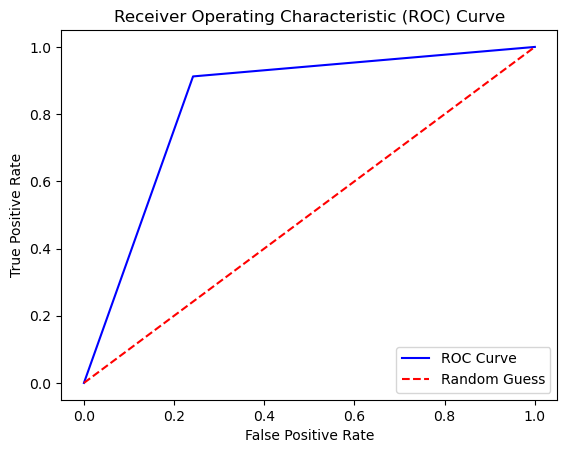

In [9]:
import pandas as pd
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.DataFrame({'coloumn1': y_val, 'coloumn2': y_pred})
print(df)
# tilføje hvert element i listen som række til kolonnen


# Extract the true labels and predicted scores from the dataframe
y_true = df['coloumn1'].values
y_scores = df['coloumn2'].values

# Calculate the fpr and tpr
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
